Importing the libraries

In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

Importing the index for reference

In [535]:
ind = pd.read_excel('/content/international_leverage_2023.xlsx', sheet_name = 'Sheet2')
ind

,Variable Name,Variable Description
0,ID,Firm Identification Code
1,year,Financial Year of Data
2,TA,Total Assets
3,SALES_USD,Net Sales in U.S. Dollars
4,MKT_EQUITY,Market Value of Common Equity
5,ST_DEBT,Short Term Debt
6,LT_DEBT,Long Term Debt
7,NPPE,"Net Property, Plant and Equipment"
8,INTEREST,Interest Expense
9,EBIT,Earnings Before Interest and Tax


read the excel file and convert it to dataset

In [536]:
df = pd.read_excel('/content/international_leverage_2023.xlsx', sheet_name = 'Sheet1')
df

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,NET_INCOME,NATION,COUNTRY
0,C036AAB00,2009,117.98,35.00,33.99,40.02,0.60,66.56,78.92,7.84,-15.48,-12.60,17.49,95.22,-25.04,36,Australia
1,C036AAB00,2010,38.07,12.21,72.88,-25.37,0.62,59.03,7.55,4.73,-88.72,-86.61,17.18,31.99,-93.48,36,Australia
2,C036AAB00,2011,36.60,15.09,41.71,-35.72,14.91,50.22,6.66,5.29,-16.38,-15.82,15.94,39.23,-21.67,36,Australia
3,C036AAB00,2012,10.70,38.91,1.18,-24.37,0.08,31.21,0.68,3.24,-2.83,-2.44,2.04,10.96,-6.02,36,Australia
4,C036ABF00,2007,934.71,108.52,449.35,403.75,21.30,226.76,697.73,23.01,-89.59,-55.48,142.52,819.91,-81.81,36,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113280,C82699850,2013,255.16,461.95,852.48,148.53,0.00,0.00,19.10,0.00,43.15,81.34,73.02,422.45,31.82,826,UK
113281,C82699850,2014,254.38,428.37,912.27,151.50,0.00,0.00,20.40,0.00,39.09,77.16,76.76,396.24,29.13,826,UK
113282,C82699850,2015,267.09,435.81,766.49,153.45,0.00,0.00,23.20,0.00,39.09,78.67,78.31,393.94,29.52,826,UK
113283,C82699850,2016,294.32,409.29,883.21,165.08,0.00,0.00,20.57,0.00,48.82,89.33,95.15,362.91,35.75,826,UK


In [537]:
df.shape

(113285, 17)

Data Preprocesing:

In [538]:
df.columns

Index(['ws_num', 'year', 'TA', 'SALES_USD', 'MKT_EQUITY', 'BOOK_EQUITY',
       'ST_DEBT', 'LT_DEBT', 'NPPE', 'INTEREST', 'EBIT', 'EBITDA', 'CASH',
       'TA_USD', 'NET_INCOME', 'NATION', 'COUNTRY'],
      dtype='object')

drop null and duplicate values

In [539]:
# df = df[(df['NET_INCOME']>0.0)& (df['EBIT']>0.0)] #keep the net_income and EBIT values >0
# df

In [540]:
df.dropna(inplace = True) 

In [541]:
df.drop_duplicates(inplace = True)

In [542]:
df.shape

(95755, 17)

In [543]:
df.rename(columns = {'year':'Year'}, inplace = True)

In [544]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [545]:
df.COUNTRY.unique()

array(['Australia', 'Hong Kong', 'Japan', 'UK'], dtype=object)

In [546]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,95755.00,2014.50,4.61,2007.00,2010.00,2015.00,2019.00,2022.00
TA,95755.00,164875.33,1258500.88,5.07,960.02,9234.13,45121.50,71461131.00
SALES_USD,95755.00,1749.86,9219.50,10.00,67.93,211.73,778.53,476914.94
MKT_EQUITY,95755.00,75922.18,458427.30,0.04,621.43,4271.60,21113.22,30622275.18
BOOK_EQUITY,95755.00,56666.12,346425.23,-552947.00,399.08,3965.84,21086.03,26245969.00
ST_DEBT,95755.00,19798.90,278573.22,0.00,7.55,373.11,3232.00,19748395.00
LT_DEBT,95755.00,32161.81,282357.09,-20398.00,5.22,319.58,3231.71,15308519.00
NPPE,95755.00,47847.13,324401.74,0.00,80.86,1671.00,11388.59,12775052.00
INTEREST,95755.00,729.91,9260.11,0.00,1.94,18.80,117.46,958000.00
EBIT,95755.00,7282.24,58698.42,-784440.00,8.86,332.00,2175.58,5977706.00


## Creation of key variables:

Total Debt = Short-term Debt + Long-term Debt = ST_DEBT + LT+_DEBT.


leverage ratio =  (Total Debt/Total Assets)

coverage ratio= (EBIT/INTEREST)

In [547]:
df2 = df.copy()

In [548]:
df2['Tangibility']=df2['NPPE']/df2['TA']
df2['Market_to_book']= (df2['TA'] + df2['MKT_EQUITY'] - df2['BOOK_EQUITY']) /df2['TA']
df2['Profitability']=df2['EBITDA']/df2['TA']
df2['Logsale'] = np.log(df2['TA'])

df2['Total_debt'] = df2['ST_DEBT']+df2['LT_DEBT']
df2['Leverage'] = df2['Total_debt']/df2['TA']
df2['Coverage'] = df2['EBIT']/df2['INTEREST']



In [549]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,95755.00,2014.50,4.61,2007.00,2010.00,2015.00,2019.00,2022.00
TA,95755.00,164875.33,1258500.88,5.07,960.02,9234.13,45121.50,71461131.00
SALES_USD,95755.00,1749.86,9219.50,10.00,67.93,211.73,778.53,476914.94
MKT_EQUITY,95755.00,75922.18,458427.30,0.04,621.43,4271.60,21113.22,30622275.18
BOOK_EQUITY,95755.00,56666.12,346425.23,-552947.00,399.08,3965.84,21086.03,26245969.00
ST_DEBT,95755.00,19798.90,278573.22,0.00,7.55,373.11,3232.00,19748395.00
LT_DEBT,95755.00,32161.81,282357.09,-20398.00,5.22,319.58,3231.71,15308519.00
NPPE,95755.00,47847.13,324401.74,0.00,80.86,1671.00,11388.59,12775052.00
INTEREST,95755.00,729.91,9260.11,0.00,1.94,18.80,117.46,958000.00
EBIT,95755.00,7282.24,58698.42,-784440.00,8.86,332.00,2175.58,5977706.00


In [550]:
ind

,Variable Name,Variable Description
0,ID,Firm Identification Code
1,year,Financial Year of Data
2,TA,Total Assets
3,SALES_USD,Net Sales in U.S. Dollars
4,MKT_EQUITY,Market Value of Common Equity
5,ST_DEBT,Short Term Debt
6,LT_DEBT,Long Term Debt
7,NPPE,"Net Property, Plant and Equipment"
8,INTEREST,Interest Expense
9,EBIT,Earnings Before Interest and Tax


In [551]:
df2.columns

Index(['ws_num', 'Year', 'TA', 'SALES_USD', 'MKT_EQUITY', 'BOOK_EQUITY',
       'ST_DEBT', 'LT_DEBT', 'NPPE', 'INTEREST', 'EBIT', 'EBITDA', 'CASH',
       'TA_USD', 'NET_INCOME', 'NATION', 'COUNTRY', 'Tangibility',
       'Market_to_book', 'Profitability', 'Logsale', 'Total_debt', 'Leverage',
       'Coverage'],
      dtype='object')

create a new df with requred columns

In [552]:
newdf = df2[['Year','TA','Total_debt',"Tangibility", "Market_to_book", 
              "Profitability",'Logsale', "Leverage",'Coverage', "COUNTRY"]]

In [553]:
newdf.head()

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage,COUNTRY
0,2009,117.98,67.16,0.67,0.95,-0.11,4.77,0.57,-1.97,Australia
1,2010,38.07,59.65,0.20,3.58,-2.27,3.64,1.57,-18.77,Australia
2,2011,36.60,65.13,0.18,3.12,-0.43,3.60,1.78,-3.10,Australia
3,2012,10.70,31.30,0.06,3.39,-0.23,2.37,2.92,-0.87,Australia
4,2007,934.71,248.06,0.75,1.05,-0.06,6.84,0.27,-3.89,Australia


# replace infinite values with null 

In [554]:
newdf[(newdf.Coverage==np.inf )|(newdf.Coverage==-np.inf)]

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage,COUNTRY
51,2007,46.59,0.00,0.02,7.23,0.52,3.84,0.00,inf,Australia
52,2008,56.70,0.00,0.03,2.57,0.47,4.04,0.00,inf,Australia
53,2009,60.00,0.00,0.02,1.97,0.40,4.09,0.00,inf,Australia
54,2010,64.67,0.00,0.02,3.07,0.42,4.17,0.00,inf,Australia
55,2011,65.50,0.00,0.02,2.79,0.39,4.18,0.00,inf,Australia
...,...,...,...,...,...,...,...,...,...,...
113280,2013,255.16,0.00,0.07,3.76,0.32,5.54,0.00,inf,UK
113281,2014,254.38,0.00,0.08,3.99,0.30,5.54,0.00,inf,UK
113282,2015,267.09,0.00,0.09,3.30,0.29,5.59,0.00,inf,UK
113283,2016,294.32,0.00,0.07,3.44,0.30,5.68,0.00,inf,UK


In [555]:
newdf.Coverage = newdf.Coverage.replace(np.inf,np.nan)
newdf.Coverage = newdf.Coverage.replace(-np.inf,np.nan)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [556]:
newdf.reset_index(drop=True,inplace = True)

In [557]:
newdf.tail()

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage,COUNTRY
95750,2013,255.16,0.00,0.07,3.76,0.32,5.54,0.00,NaN,UK
95751,2014,254.38,0.00,0.08,3.99,0.30,5.54,0.00,NaN,UK
95752,2015,267.09,0.00,0.09,3.30,0.29,5.59,0.00,NaN,UK
95753,2016,294.32,0.00,0.07,3.44,0.30,5.68,0.00,NaN,UK
95754,2017,307.89,0.00,0.09,3.64,0.29,5.73,0.00,NaN,UK


In [558]:
newdf[newdf['Coverage'].isnull()]

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage,COUNTRY
51,2007,46.59,0.00,0.02,7.23,0.52,3.84,0.00,NaN,Australia
52,2008,56.70,0.00,0.03,2.57,0.47,4.04,0.00,NaN,Australia
53,2009,60.00,0.00,0.02,1.97,0.40,4.09,0.00,NaN,Australia
54,2010,64.67,0.00,0.02,3.07,0.42,4.17,0.00,NaN,Australia
55,2011,65.50,0.00,0.02,2.79,0.39,4.18,0.00,NaN,Australia
...,...,...,...,...,...,...,...,...,...,...
95750,2013,255.16,0.00,0.07,3.76,0.32,5.54,0.00,NaN,UK
95751,2014,254.38,0.00,0.08,3.99,0.30,5.54,0.00,NaN,UK
95752,2015,267.09,0.00,0.09,3.30,0.29,5.59,0.00,NaN,UK
95753,2016,294.32,0.00,0.07,3.44,0.30,5.68,0.00,NaN,UK


In [559]:
newdf.dropna(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [560]:
newdf[newdf['Coverage'].isnull()]

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage,COUNTRY


## Data analysis for Australia

In [561]:
df_au = newdf[newdf['COUNTRY']=='Australia']
df_au

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage,COUNTRY
0,2009,117.98,67.16,0.67,0.95,-0.11,4.77,0.57,-1.97,Australia
1,2010,38.07,59.65,0.20,3.58,-2.27,3.64,1.57,-18.77,Australia
2,2011,36.60,65.13,0.18,3.12,-0.43,3.60,1.78,-3.10,Australia
3,2012,10.70,31.30,0.06,3.39,-0.23,2.37,2.92,-0.87,Australia
4,2007,934.71,248.06,0.75,1.05,-0.06,6.84,0.27,-3.89,Australia
...,...,...,...,...,...,...,...,...,...,...
10130,2018,42816.00,16951.00,0.52,1.38,0.26,10.66,0.40,7.38,Australia
10131,2019,42530.00,17253.00,0.53,1.73,0.19,10.66,0.41,4.75,Australia
10132,2020,44337.00,19127.00,0.55,1.51,0.20,10.70,0.43,4.48,Australia
10133,2021,42465.00,17441.00,0.56,1.71,0.18,10.66,0.41,4.97,Australia


In [562]:
df_au = df_au.dropna()
df_au.shape

(9524, 10)

In [563]:
df_au.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9524.00,2014.47,4.69,2007.00,2010.00,2014.00,2019.00,2022.00
TA,9524.00,2052.71,8296.86,9.91,75.42,248.05,992.95,157869.54
Total_debt,9524.00,602.53,2382.56,0.00,6.55,41.17,239.53,57768.37
Tangibility,9524.00,0.30,0.28,0.00,0.05,0.21,0.51,1.00
Market_to_book,9524.00,1.67,1.92,0.05,0.92,1.18,1.77,49.06
Profitability,9524.00,0.07,0.37,-10.64,0.03,0.10,0.16,22.74
Logsale,9524.00,5.73,1.82,2.29,4.32,5.51,6.90,11.97
Leverage,9524.00,0.24,0.26,0.00,0.08,0.21,0.34,10.24
Coverage,9524.00,156.98,4319.82,-106882.00,-0.44,4.25,13.90,213240.54


In [564]:
# To remove outliers, we cap the variables at top and bottom 1%
# That means at 0.01 and 0.99 quantiles
df_au1=df_au.loc[:, df_au.columns != 'COUNTRY']
df_au1=df_au1.dropna()
df_au1 = df_au1.clip(lower=df_au1.quantile(0.01), upper=df_au1.quantile(0.99),
axis=1)
df_au1.head()

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
0,2009,117.98,67.16,0.67,0.95,-0.11,4.77,0.57,-1.97
1,2010,38.07,59.65,0.20,3.58,-0.72,3.64,0.92,-18.77
2,2011,36.60,65.13,0.18,3.12,-0.43,3.60,0.92,-3.10
3,2012,14.73,31.30,0.06,3.39,-0.23,2.69,0.92,-0.87
4,2007,934.71,248.06,0.75,1.05,-0.06,6.84,0.27,-3.89


In [565]:
# This is the unclipped distribution
df_au.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])


,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
0.00,2007.00,9.91,0.00,0.00,0.05,-10.64,2.29,0.00,-106882.00
0.01,2007.00,14.73,0.00,0.00,0.48,-0.72,2.69,0.00,-354.86
0.25,2010.00,75.42,6.55,0.05,0.92,0.03,4.32,0.08,-0.44
0.50,2014.00,248.05,41.17,0.21,1.18,0.10,5.51,0.21,4.25
0.75,2019.00,992.95,239.53,0.51,1.77,0.16,6.90,0.34,13.90
0.99,2022.00,27917.27,10129.63,0.94,8.31,0.51,10.24,0.92,1954.78
1.00,2022.00,157869.54,57768.37,1.00,49.06,22.74,11.97,10.24,213240.54


In [566]:
# This is the clipped distribution which has replaced the outliers
df_au1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])


,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
0.00,2007.00,14.73,0.00,0.00,0.48,-0.72,2.69,0.00,-354.86
0.01,2007.00,14.74,0.00,0.00,0.48,-0.72,2.69,0.00,-353.96
0.25,2010.00,75.42,6.55,0.05,0.92,0.03,4.32,0.08,-0.44
0.50,2014.00,248.05,41.17,0.21,1.18,0.10,5.51,0.21,4.25
0.75,2019.00,992.95,239.53,0.51,1.77,0.16,6.90,0.34,13.90
0.99,2022.00,27868.20,10129.03,0.94,8.31,0.51,10.24,0.92,1952.30
1.00,2022.00,27917.27,10129.63,0.94,8.31,0.51,10.24,0.92,1954.78


Leverage Box Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


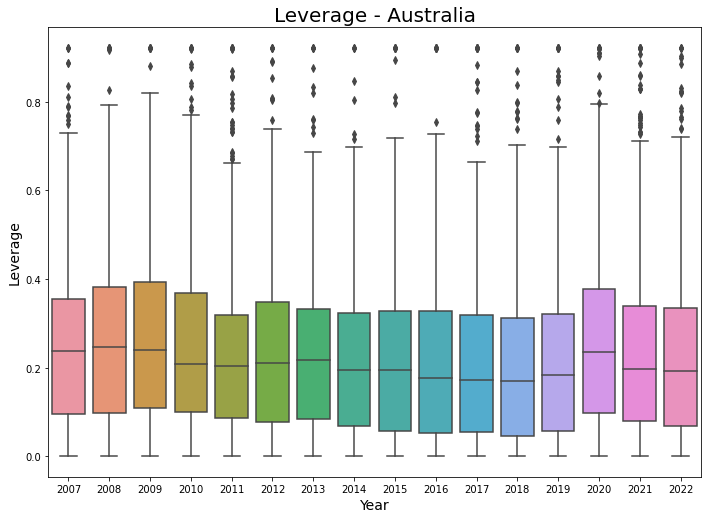

In [567]:
with sns.axes_style(style=None):
 fig, ax = plt.subplots()
 fig.set_size_inches(11.7, 8.27)
 sns.boxplot("Year","Leverage",data=df_au1,ax=ax)
 
 ax.set_xlabel('Year', fontsize=14)
 ax.set_ylabel('Leverage', fontsize=14)
 ax.set_title('Leverage - Australia', fontsize=20)

Distribution of Leverage Over time

In [568]:
df_au.groupby('Year').Leverage.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2007,630.00,0.25,0.21,0.00,0.09,0.24,0.35,2.20
2008,648.00,0.27,0.23,0.00,0.10,0.25,0.38,2.00
2009,602.00,0.28,0.26,0.00,0.11,0.24,0.39,3.60
2010,604.00,0.26,0.24,0.00,0.10,0.21,0.37,2.92
2011,603.00,0.25,0.37,0.00,0.09,0.20,0.32,7.78
2012,592.00,0.24,0.23,0.00,0.08,0.21,0.35,2.92
2013,559.00,0.24,0.23,0.00,0.09,0.22,0.33,2.88
2014,556.00,0.23,0.46,0.00,0.07,0.19,0.32,10.24
2015,546.00,0.22,0.20,0.00,0.06,0.20,0.33,1.41


In [569]:
g_df1 = df_au1[['Year', 'Leverage']]
g_df1 = g_df1.groupby('Year')
quantiles = g_df1['Leverage'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_df1['Leverage'].agg(['mean'])
data_combined=pd.concat([quantiles, mean], 1)
data_stacked=data_combined.stack().reset_index(name='Leverage').rename(columns={'level_1': 'Quantiles and Mean'})



<ipython-input-569-11a882c9c795>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_combined=pd.concat([quantiles, mean], 1)


Graph plot

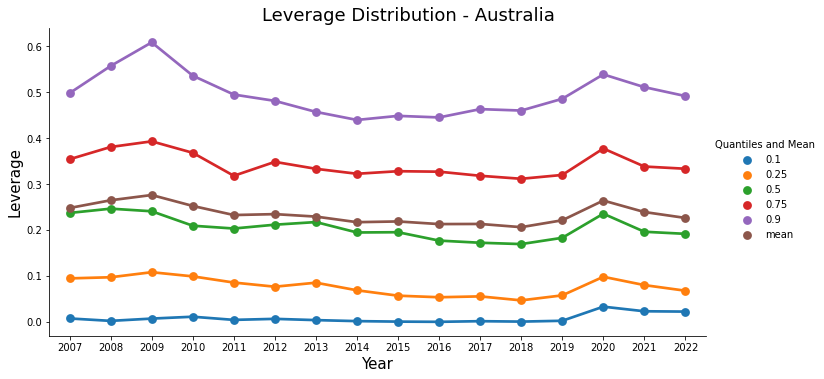

In [570]:
# Catplot
ax = sns.catplot(x="Year", y="Leverage", hue="Quantiles and Mean", kind="point", data=data_stacked,
 height=5, # make the plot 5 units high
 aspect=2); # height should be three times width
ax.fig.suptitle('Leverage Distribution - Australia',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Leverage', fontsize=15);

Distribution of Coverage over time

In [571]:
df_au.groupby('Year').Coverage.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2007,630.00,193.11,1850.40,-391.00,1.77,5.01,15.68,32801.00
2008,648.00,290.17,5096.82,-3170.00,0.92,3.86,12.44,128730.00
2009,602.00,398.73,9519.59,-61781.00,-1.89,2.53,8.64,213240.54
2010,604.00,136.99,1680.53,-872.67,0.65,3.94,11.28,37541.00
2011,603.00,165.95,2309.06,-4532.83,0.59,3.50,10.99,41055.00
2012,592.00,50.50,496.08,-1463.29,-0.03,3.97,12.59,10624.00
2013,559.00,158.46,2221.14,-2372.67,-0.61,3.65,11.87,46151.00
2014,556.00,42.62,725.35,-6980.25,-0.80,3.70,11.07,9593.00
2015,546.00,65.32,2353.79,-24709.00,-1.13,4.89,14.79,40938.50


In [572]:
g_df1 = df_au1[['Year', 'Coverage']]
g_df1 = g_df1.groupby('Year')
quantiles = g_df1['Coverage'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_df1['Coverage'].agg(['mean'])
data_combined=pd.concat([quantiles, mean], 1)
data_stacked=data_combined.stack().reset_index(name='Coverage').rename(columns={'level_1': 'Quantiles and Mean'})

<ipython-input-572-0103d633c6a6>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_combined=pd.concat([quantiles, mean], 1)


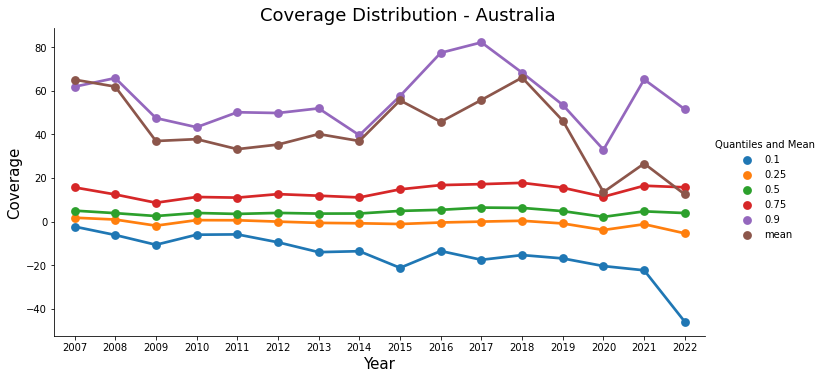

In [573]:
# Catplot
ax = sns.catplot(x="Year", y="Coverage", hue="Quantiles and Mean", kind="point", data=data_stacked,
 height=5, # make the plot 5 units high
 aspect=2); # height should be three times width
ax.fig.suptitle('Coverage Distribution - Australia',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Coverage', fontsize=15);

# Conclusion
Leverage increased highly in 2020, and Coverage dropped simultaneously for Australia 

### Zero Leverage firms in Australia

In [574]:
df_au.shape

(9524, 10)

In [575]:
nlaus = df_au1[df_au1.Leverage == 0]
nlaus.Year.value_counts()

2016    51
2018    50
2015    49
2008    48
2017    46
2014    43
2007    42
2019    41
2009    41
2013    39
2012    35
2011    34
2010    26
2021     5
2020     4
2022     1
Name: Year, dtype: int64

In [576]:
nlaus.Leverage.count()

555

In [577]:
nlaus_year = nlaus.groupby('Year').Leverage.count()

Bar plot

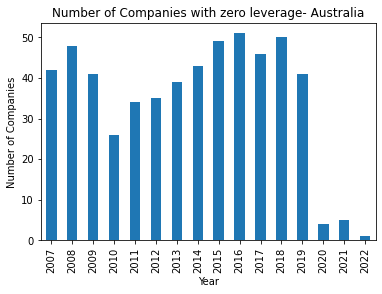

In [578]:
nlaus_year.plot(kind='bar')
plt.title('Number of Companies with zero leverage- Australia')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.show()

### Leverage for 2007 and 2022 only

In [579]:
df_au_2007 = df_au1[df_au1['Year'] == 2007]
df_au_2022 = df_au1[df_au1['Year'] == 2022]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


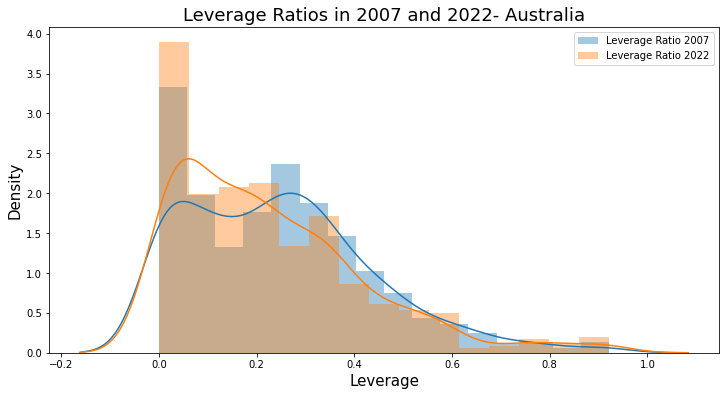

In [580]:
plt.figure(figsize=(12,6))
plt.xlabel('Leverage', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title("Leverage Ratios in 2007 and 2022- Australia",fontsize=18)
sns.distplot(df_au_2007["Leverage"].values, label="Leverage Ratio 2007");
sns.distplot(df_au_2022["Leverage"].values, label="Leverage Ratio 2022");
plt.legend()
plt.show()

### Leverage value is high in 2007 and density is low
### Leverage density is high in 2022 but value less

In [581]:
# part 1 complete

# Analysis of Determinants of leverage

In [582]:
df_au1.head()

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
0,2009,117.98,67.16,0.67,0.95,-0.11,4.77,0.57,-1.97
1,2010,38.07,59.65,0.20,3.58,-0.72,3.64,0.92,-18.77
2,2011,36.60,65.13,0.18,3.12,-0.43,3.60,0.92,-3.10
3,2012,14.73,31.30,0.06,3.39,-0.23,2.69,0.92,-0.87
4,2007,934.71,248.06,0.75,1.05,-0.06,6.84,0.27,-3.89


Tangibility vs leverage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


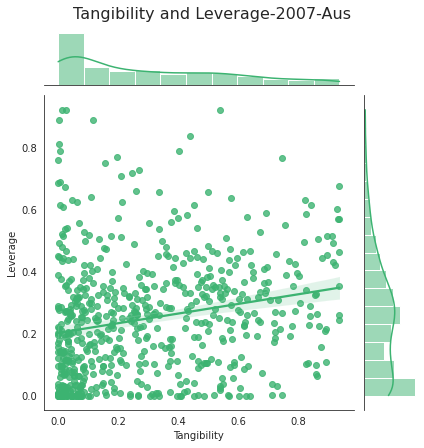

In [583]:
# 2007
with sns.axes_style('white'):
 p = sns.jointplot("Tangibility","Leverage", data=df_au_2007, kind='reg',
color='mediumseagreen')
 p.fig.suptitle("Tangibility and Leverage-2007-Aus",fontsize=16,y=1.03)
 
 plt.xlabel('Tangibility', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


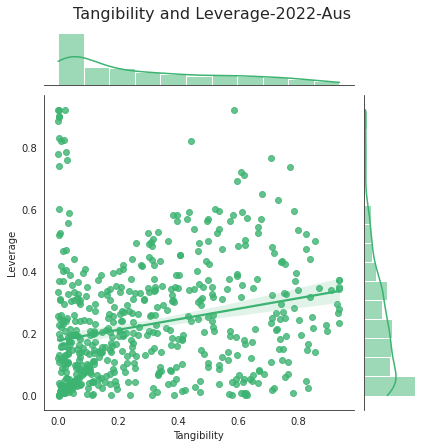

In [584]:
# 2022
with sns.axes_style('white'):
 p = sns.jointplot("Tangibility","Leverage", data=df_au_2022, kind='reg',
color='mediumseagreen')
 p.fig.suptitle("Tangibility and Leverage-2022-Aus",fontsize=16,y=1.03)
 
 plt.xlabel('Tangibility', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

Market_to_book vs leverage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


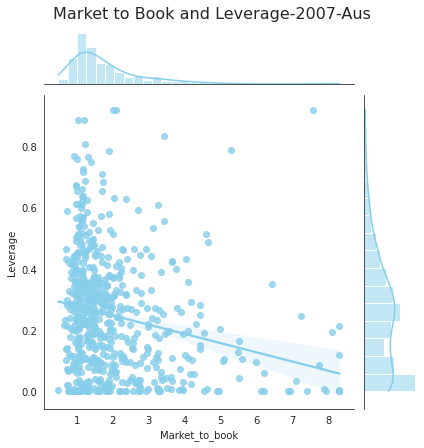

In [585]:
# 2007
with sns.axes_style('white'):
 p = sns.jointplot("Market_to_book","Leverage", data=df_au_2007, kind='reg',
color='skyblue')
 p.fig.suptitle("Market to Book and Leverage-2007-Aus",fontsize=16,y=1.03)
 
 plt.xlabel('MTB', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


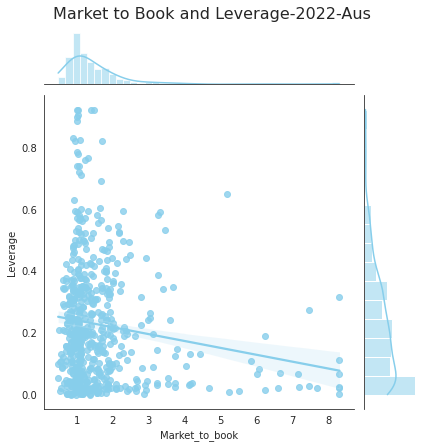

In [586]:
# 2022
with sns.axes_style('white'):
 p = sns.jointplot("Market_to_book","Leverage", data=df_au_2022, kind='reg',
color='skyblue')
 p.fig.suptitle("Market to Book and Leverage-2022-Aus",fontsize=16,y=1.03)
 
 plt.xlabel('MTB', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

Profitability vs Leverage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


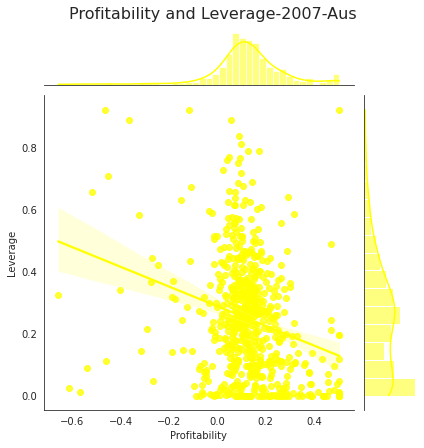

In [587]:
# 2007
with sns.axes_style('white'):
 p = sns.jointplot("Profitability","Leverage", data=df_au_2007, kind='reg',
color='yellow')
 p.fig.suptitle("Profitability and Leverage-2007-Aus",fontsize=16,y=1.03)
 
 plt.xlabel('Profitability', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


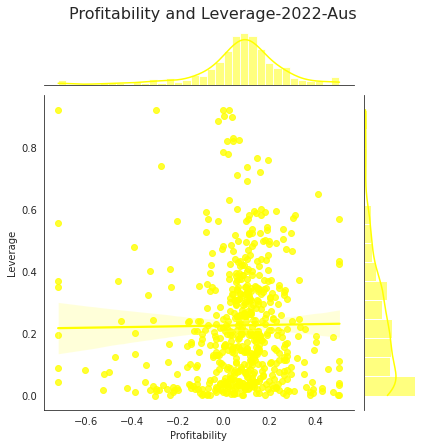

In [588]:
# 2022
with sns.axes_style('white'):
 p = sns.jointplot("Profitability","Leverage", data=df_au_2022, kind='reg',
color='yellow')
 p.fig.suptitle("Profitability and Leverage-2022-Aus",fontsize=16,y=1.03)
 
 plt.xlabel('Profitability', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

Coverage vs Leverage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


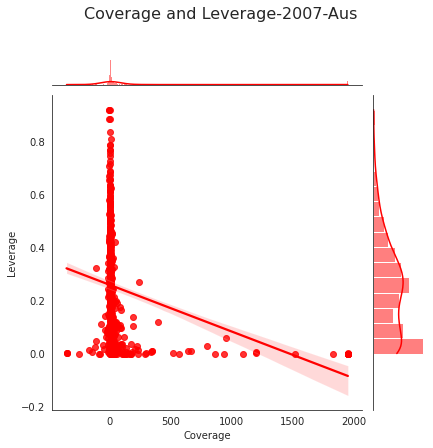

In [589]:
# 2007
with sns.axes_style('white'):
 p = sns.jointplot("Coverage","Leverage", data=df_au_2007, kind='reg',
color='red')
 p.fig.suptitle("Coverage and Leverage-2007-Aus",fontsize=16,y=1.03)
 
 plt.xlabel('Coverage', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


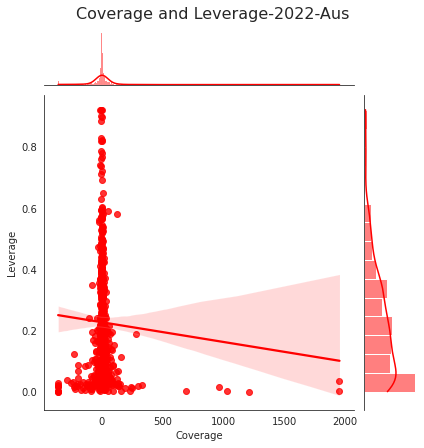

In [590]:
# 2022
with sns.axes_style('white'):
 p = sns.jointplot("Coverage","Leverage", data=df_au_2022, kind='reg',
color='red')
 p.fig.suptitle("Coverage and Leverage-2022-Aus",fontsize=16,y=1.03)
 
 plt.xlabel('Coverage', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

## Correlation Analysis

In [591]:
from scipy import stats

In [592]:
df_corr = pd.DataFrame()
df_corr_p = pd.DataFrame()


In [593]:
for x in df_au1.columns:
  for y in df_au1.columns:
    corr = stats.pearsonr(df_au1[x], df_au1[y])
    df_corr.loc[x,y] = corr[0]
    df_corr_p.loc[x,y] = corr[1]

In [594]:
df_corr

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
Year,1.00,0.06,0.04,0.00,0.10,-0.05,0.06,-0.05,-0.03
TA,0.06,1.00,0.91,0.15,-0.04,0.06,0.69,0.13,-0.04
Total_debt,0.04,0.91,1.00,0.15,-0.03,0.04,0.62,0.29,-0.05
Tangibility,0.00,0.15,0.15,1.00,-0.14,0.02,0.21,0.17,-0.06
Market_to_book,0.10,-0.04,-0.03,-0.14,1.00,0.21,-0.08,-0.14,0.18
Profitability,-0.05,0.06,0.04,0.02,0.21,1.00,0.14,-0.17,0.28
Logsale,0.06,0.69,0.62,0.21,-0.08,0.14,1.00,0.22,-0.04
Leverage,-0.05,0.13,0.29,0.17,-0.14,-0.17,0.22,1.00,-0.18
Coverage,-0.03,-0.04,-0.05,-0.06,0.18,0.28,-0.04,-0.18,1.00


In [595]:
df_corr_p

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
Year,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00
TA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Total_debt,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Tangibility,0.63,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00
Market_to_book,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Profitability,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00
Logsale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Leverage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Coverage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [596]:
CorrMatrix = df_au1.corr()

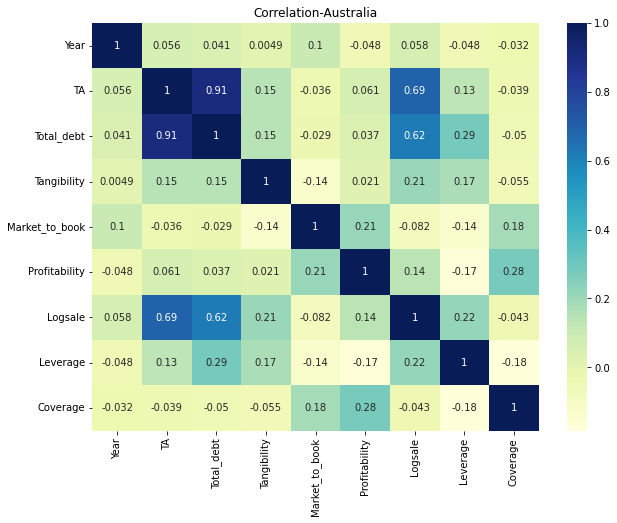

In [597]:
plt.subplots(figsize=(10,7.5))
sns.heatmap(CorrMatrix,annot=True,cmap="YlGnBu")
plt.title('Correlation-Australia')
plt.show()

# Regression Analysis
Use of simple linear regression

In [598]:
from sklearn.linear_model import LinearRegression

In [599]:
X = df_au_2022["Tangibility"].values.reshape(-1, 1) 
Y = df_au_2022["Leverage"].values.reshape(-1, 1) 


In [600]:
linear_regressor = LinearRegression() # create object for the class
linear_regressor.fit(X, Y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions


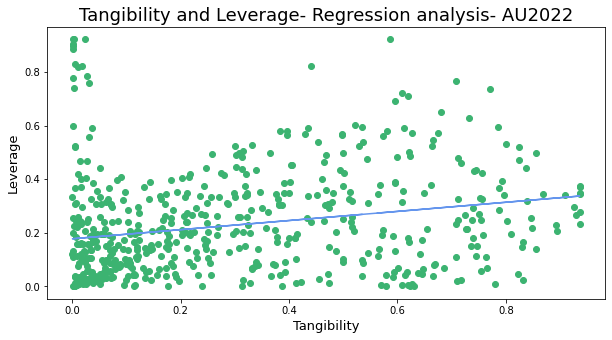

In [601]:
plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')
plt.title('Tangibility and Leverage- Regression analysis- AU2022', fontsize=18);
plt.xlabel('Tangibility', fontsize=13)
plt.ylabel('Leverage', fontsize=13)
plt.show()

In [602]:
X = df_au_2022["Profitability"].values.reshape(-1, 1) 
Y = df_au_2022["Leverage"].values.reshape(-1, 1) 

linear_regressor = LinearRegression() # create object for the class
linear_regressor.fit(X, Y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions


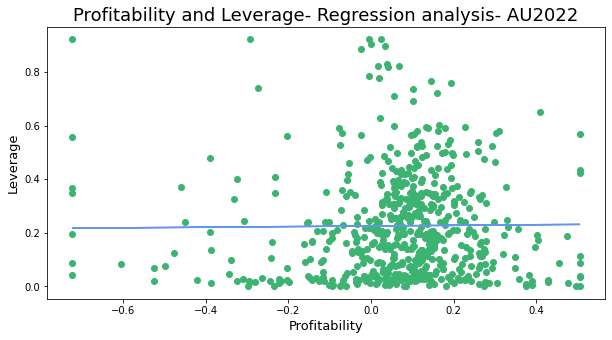

In [603]:
plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')
plt.title('Profitability and Leverage- Regression analysis- AU2022', fontsize=18);
plt.xlabel('Profitability', fontsize=13)
plt.ylabel('Leverage', fontsize=13)
plt.show()

In [604]:
X = df_au_2022["Coverage"].values.reshape(-1, 1) 
Y = df_au_2022["Leverage"].values.reshape(-1, 1) 

linear_regressor = LinearRegression() # create object for the class
linear_regressor.fit(X, Y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions


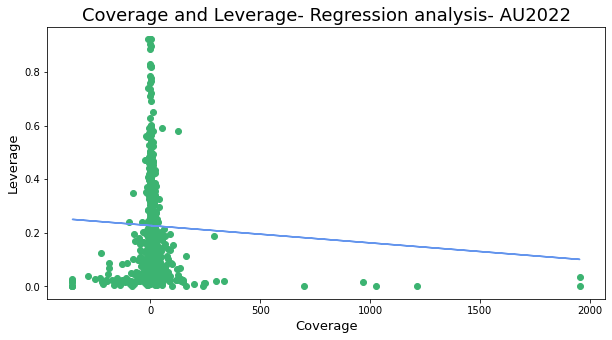

In [605]:
plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')
plt.title('Coverage and Leverage- Regression analysis- AU2022', fontsize=18);
plt.xlabel('Coverage', fontsize=13)
plt.ylabel('Leverage', fontsize=13)
plt.show()

Regression Analysis:

We use the ordinary least squares or ols method from the statsmodels to look at the relation between firm characteristics¶

In [606]:
import statsmodels.formula.api as sm

In [607]:
result = sm.ols(formula="Leverage ~ Tangibility + Market_to_book + Logsale + Profitability", data=df_au1).fit()
print(result.params)

result.summary()

Intercept         0.11
Tangibility       0.09
Market_to_book   -0.01
Logsale           0.02
Profitability    -0.21
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Leverage   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     288.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):          2.30e-234
Time:                        06:00:04   Log-Likelihood:                 2437.9
No. Observations:                9524   AIC:                            -4866.
Df Residuals:                    9519   BIC:                            -4830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1074      0.007     14.961      0.000       0.093       0.121
Tangibility        0.0861      0.007     12.008      0.000       0.072       0.100
Market_to_book    -0.0097      0.002     -6.188      0.000      -0.013      -0.007
Logsale            0.0234      0.001     21.206      0.000       0.021       0.026
Profitability     -0.2088      0.011    -19.172      0.000      -0.230      -0.187
==============================================================================
Omnibus:                     1495.899   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2498.150
Skew:                           1.049   Prob(JB):                         0.00
Kurtosis:                       4.376   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analysis For UK

In [608]:
df_uk = newdf[newdf['COUNTRY']=='UK']
df_uk

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage,COUNTRY
81350,2007,354.32,73.26,0.44,1.11,0.16,5.87,0.21,12.10,UK
81351,2008,334.85,51.86,0.33,0.66,0.08,5.81,0.15,6.62,UK
81352,2009,289.73,36.39,0.06,0.81,-0.02,5.67,0.13,-3.49,UK
81353,2010,289.60,15.43,0.05,0.77,0.09,5.67,0.05,8.64,UK
81354,2011,284.99,6.50,0.05,0.92,0.08,5.65,0.02,14.23,UK
...,...,...,...,...,...,...,...,...,...,...
95740,2011,39.42,0.00,0.03,1.14,0.16,3.67,0.00,49.81,UK
95741,2012,66.17,9.75,0.02,1.04,0.10,4.19,0.15,19.50,UK
95742,2013,59.85,5.03,0.01,1.55,0.20,4.09,0.08,15.96,UK
95743,2014,91.40,0.86,0.01,1.09,0.14,4.52,0.01,12.54,UK


In [609]:
df_uk = df_uk.dropna()
df_uk.shape

(13458, 10)

In [610]:
df_uk.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,13458.00,2013.85,4.59,2007.00,2010.00,2014.00,2018.00,2022.00
TA,13458.00,3084.32,21796.48,5.07,51.42,192.31,962.04,849090.00
Total_debt,13458.00,726.87,3472.20,0.00,3.69,27.51,212.32,78958.23
Tangibility,13458.00,0.26,0.27,0.00,0.04,0.15,0.40,1.70
Market_to_book,13458.00,1.69,2.13,-0.05,0.97,1.27,1.86,91.20
Profitability,13458.00,0.08,0.20,-4.64,0.04,0.09,0.15,8.76
Logsale,13458.00,5.50,2.03,1.62,3.94,5.26,6.87,13.65
Leverage,13458.00,0.22,0.20,0.00,0.06,0.19,0.32,2.42
Coverage,13458.00,77.65,1271.32,-34663.00,0.64,5.34,17.67,108056.00


In [611]:
# To remove outliers, we cap the variables at top and bottom 1%
# That means at 0.01 and 0.99 quantiles
df_uk1=df_uk.loc[:, df_uk.columns != 'COUNTRY']
df_uk1=df_uk1.dropna()
df_uk1 = df_uk1.clip(lower=df_uk1.quantile(0.01), upper=df_uk1.quantile(0.99),
axis=1)
df_uk1.head()

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
81350,2007,354.32,73.26,0.44,1.11,0.16,5.87,0.21,12.10
81351,2008,334.85,51.86,0.33,0.66,0.08,5.81,0.15,6.62
81352,2009,289.73,36.39,0.06,0.81,-0.02,5.67,0.13,-3.49
81353,2010,289.60,15.43,0.05,0.77,0.09,5.67,0.05,8.64
81354,2011,284.99,6.50,0.05,0.92,0.08,5.65,0.02,14.23


In [612]:
# This is the unclipped distribution
df_uk.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])


,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
0.00,2007.00,5.07,0.00,0.00,-0.05,-4.64,1.62,0.00,-34663.00
0.01,2007.00,7.72,0.00,0.00,0.52,-0.51,2.04,0.00,-329.83
0.25,2010.00,51.42,3.69,0.04,0.97,0.04,3.94,0.06,0.64
0.50,2014.00,192.31,27.51,0.15,1.27,0.09,5.26,0.19,5.34
0.75,2018.00,962.04,212.32,0.40,1.86,0.15,6.87,0.32,17.67
0.99,2022.00,50934.55,14367.80,0.95,7.02,0.41,10.84,0.84,1837.71
1.00,2022.00,849090.00,78958.23,1.70,91.20,8.76,13.65,2.42,108056.00


In [613]:
# This is the clipped distribution which has replaced the outliers
df_uk1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])


,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
0.00,2007.00,7.72,0.00,0.00,0.52,-0.51,2.04,0.00,-329.83
0.01,2007.00,7.72,0.00,0.00,0.52,-0.51,2.04,0.00,-328.42
0.25,2010.00,51.42,3.69,0.04,0.97,0.04,3.94,0.06,0.64
0.50,2014.00,192.31,27.51,0.15,1.27,0.09,5.26,0.19,5.34
0.75,2018.00,962.04,212.32,0.40,1.86,0.15,6.87,0.32,17.67
0.99,2022.00,50861.40,14327.97,0.95,7.02,0.41,10.84,0.83,1836.85
1.00,2022.00,50934.55,14367.80,0.95,7.02,0.41,10.84,0.84,1837.71


Leverage Box Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


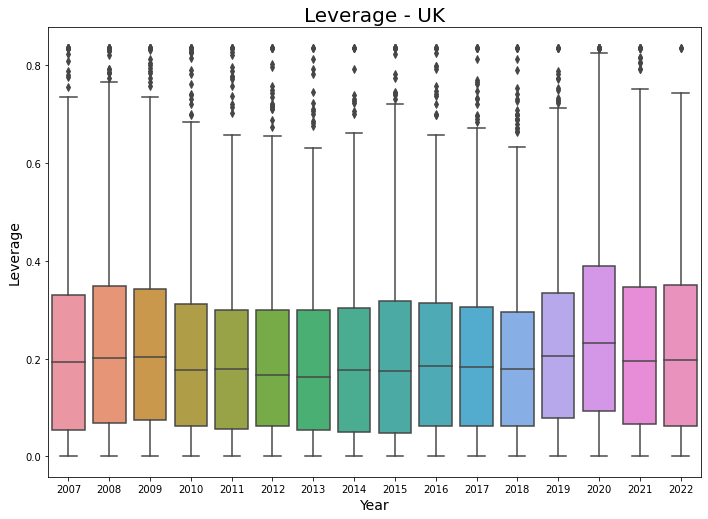

In [614]:
with sns.axes_style(style=None):
 fig, ax = plt.subplots()
 fig.set_size_inches(11.7, 8.27)
 sns.boxplot("Year","Leverage",data=df_uk1,ax=ax)
 
 ax.set_xlabel('Year', fontsize=14)
 ax.set_ylabel('Leverage', fontsize=14)
 ax.set_title('Leverage - UK', fontsize=20)

Distribution of Leverage Over time

In [615]:
df_uk.groupby('Year').Leverage.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2007,1151.00,0.22,0.21,0.00,0.05,0.19,0.33,2.42
2008,1054.00,0.24,0.20,0.00,0.07,0.20,0.35,1.44
2009,958.00,0.24,0.22,0.00,0.08,0.20,0.34,2.30
2010,906.00,0.22,0.20,0.00,0.06,0.18,0.31,1.52
2011,850.00,0.21,0.20,0.00,0.06,0.18,0.30,1.72
2012,832.00,0.21,0.18,0.00,0.06,0.17,0.30,1.34
2013,824.00,0.20,0.18,0.00,0.05,0.16,0.30,1.35
2014,831.00,0.21,0.18,0.00,0.05,0.18,0.30,1.10
2015,812.00,0.22,0.21,0.00,0.05,0.18,0.32,1.73


In [616]:
g_df2 = df_uk1[['Year', 'Leverage']]
g_df2 = g_df2.groupby('Year')
quantiles = g_df2['Leverage'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_df2['Leverage'].agg(['mean'])
data_combined=pd.concat([quantiles, mean], 1)
data_stacked=data_combined.stack().reset_index(name='Leverage').rename(columns={'level_1': 'Quantiles and Mean'})



<ipython-input-616-e30bef6b60c2>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_combined=pd.concat([quantiles, mean], 1)


Graph plot

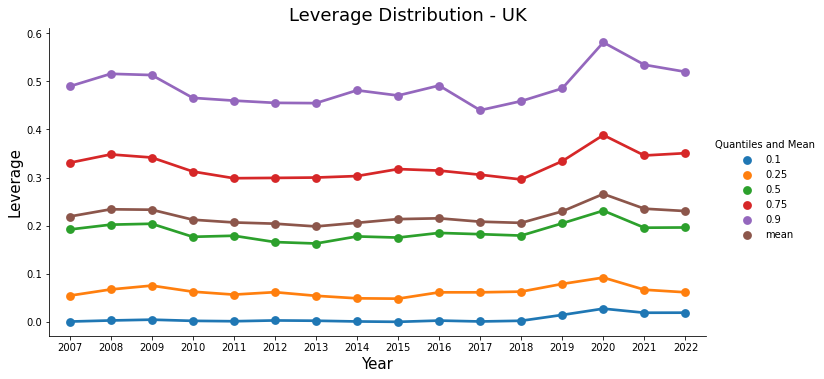

In [617]:
# Catplot
ax = sns.catplot(x="Year", y="Leverage", hue="Quantiles and Mean", kind="point", data=data_stacked,
 height=5, # make the plot 5 units high
 aspect=2); # height should be three times width
ax.fig.suptitle('Leverage Distribution - UK',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Leverage', fontsize=15);

Distribution of Coverage over time

In [658]:
df_uk.groupby('Year').Coverage.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2007,1151.00,114.66,1000.36,-1736.00,1.62,5.17,13.66,19647.00
2008,1054.00,82.23,689.02,-2804.50,-0.24,3.89,11.43,13681.00
2009,958.00,76.86,702.12,-1424.00,-1.67,3.03,11.50,13987.00
2010,906.00,51.60,781.62,-11803.00,1.21,5.65,18.61,10259.00
2011,850.00,63.01,472.09,-4349.00,1.19,5.67,18.47,6522.00
2012,832.00,63.25,389.72,-4082.50,1.10,5.86,20.40,4713.00
2013,824.00,170.65,4012.13,-34663.00,1.33,5.89,23.65,108056.00
2014,831.00,67.43,1414.37,-23913.00,1.37,6.64,23.34,26973.00
2015,812.00,84.05,996.10,-7909.00,0.78,6.74,20.84,16586.00


In [619]:
g_df2 = df_uk1[['Year', 'Coverage']]
g_df2 = g_df2.groupby('Year')
quantiles = g_df2['Coverage'].quantile([0.10, 0.25, 0.5, 0.75, 0.90]).unstack()
mean = g_df2['Coverage'].agg(['mean'])
data_combined=pd.concat([quantiles, mean], 1)
data_stacked=data_combined.stack().reset_index(name='Coverage').rename(columns={'level_1': 'Quantiles and Mean'})

<ipython-input-619-e97cdbc5dfca>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  data_combined=pd.concat([quantiles, mean], 1)


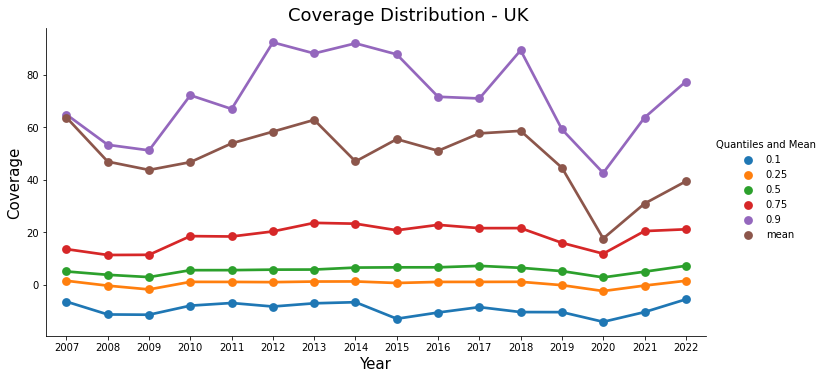

In [620]:
# Catplot
ax = sns.catplot(x="Year", y="Coverage", hue="Quantiles and Mean", kind="point", data=data_stacked,
 height=5, # make the plot 5 units high
 aspect=2); # height should be three times width
ax.fig.suptitle('Coverage Distribution - UK',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Coverage', fontsize=15);

# Conclusion
Leverage increased highly in 2020, and Coverage dropped simultaneously for UK

### Zero Leverage firms in UK

In [621]:
df_uk.shape

(13458, 10)

In [622]:
nluk = df_uk1[df_uk1.Leverage == 0]
nluk.Year.value_counts()

2007    104
2015     84
2008     77
2017     75
2014     74
2018     71
2010     68
2013     65
2011     63
2016     62
2012     59
2009     56
2019     39
2021      6
2020      5
2022      1
Name: Year, dtype: int64

In [623]:
nluk.Leverage.count()

909

In [624]:
nluk_year = nluk.groupby('Year').Leverage.count()

Bar plot

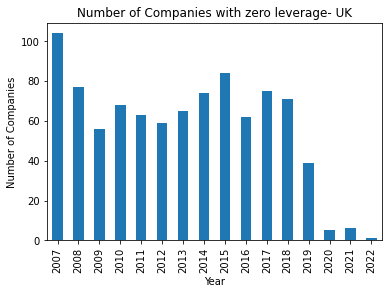

In [625]:
nluk_year.plot(kind='bar')
plt.title('Number of Companies with zero leverage- UK')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.show()

### Leverage for 2007 and 2022 only

In [626]:
df_uk_2007 = df_uk1[df_uk1['Year'] == 2007]
df_uk_2022 = df_uk1[df_uk1['Year'] == 2022]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


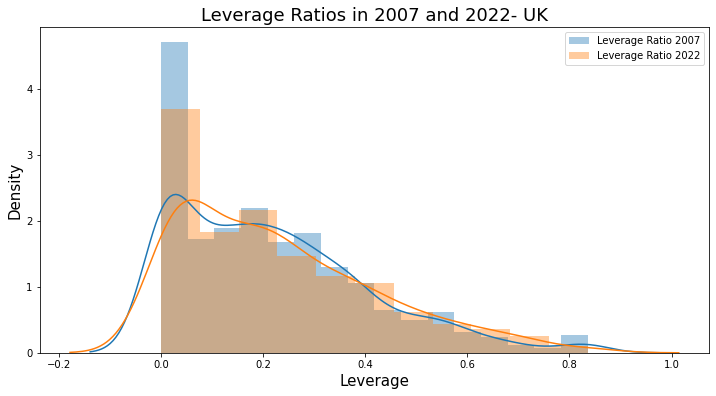

In [627]:
plt.figure(figsize=(12,6))
plt.xlabel('Leverage', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title("Leverage Ratios in 2007 and 2022- UK",fontsize=18)
sns.distplot(df_uk_2007["Leverage"].values, label="Leverage Ratio 2007");
sns.distplot(df_uk_2022["Leverage"].values, label="Leverage Ratio 2022");
plt.legend()
plt.show()

### Leverage value is high in 2007 and density is low
### Leverage density is high in 2022 but value less

In [628]:
# part 1 complete

# Analysis of Determinants of leverage

In [629]:
df_uk1.head()

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
81350,2007,354.32,73.26,0.44,1.11,0.16,5.87,0.21,12.10
81351,2008,334.85,51.86,0.33,0.66,0.08,5.81,0.15,6.62
81352,2009,289.73,36.39,0.06,0.81,-0.02,5.67,0.13,-3.49
81353,2010,289.60,15.43,0.05,0.77,0.09,5.67,0.05,8.64
81354,2011,284.99,6.50,0.05,0.92,0.08,5.65,0.02,14.23


Tangibility vs leverage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


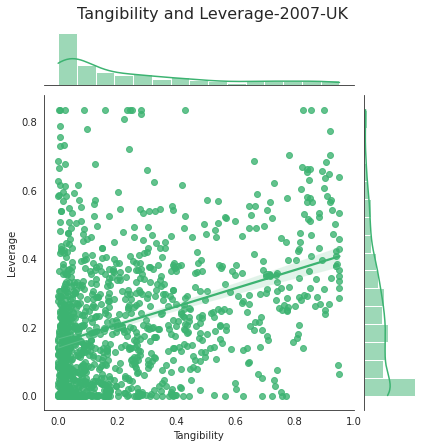

In [630]:
# 2007
with sns.axes_style('white'):
 p = sns.jointplot("Tangibility","Leverage", data=df_uk_2007, kind='reg',
color='mediumseagreen')
 p.fig.suptitle("Tangibility and Leverage-2007-UK",fontsize=16,y=1.03)
 
 plt.xlabel('Tangibility', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


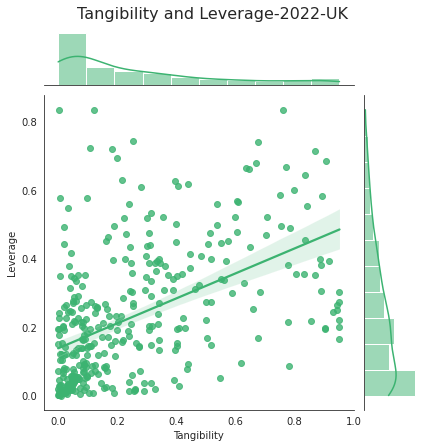

In [631]:
# 2022
with sns.axes_style('white'):
 p = sns.jointplot("Tangibility","Leverage", data=df_uk_2022, kind='reg',
color='mediumseagreen')
 p.fig.suptitle("Tangibility and Leverage-2022-UK",fontsize=16,y=1.03)
 
 plt.xlabel('Tangibility', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

Market_to_book vs leverage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


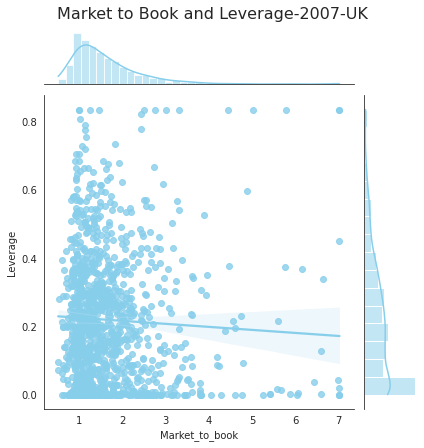

In [632]:
# 2007
with sns.axes_style('white'):
 p = sns.jointplot("Market_to_book","Leverage", data=df_uk_2007, kind='reg',
color='skyblue')
 p.fig.suptitle("Market to Book and Leverage-2007-UK",fontsize=16,y=1.03)
 
 plt.xlabel('MTB', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


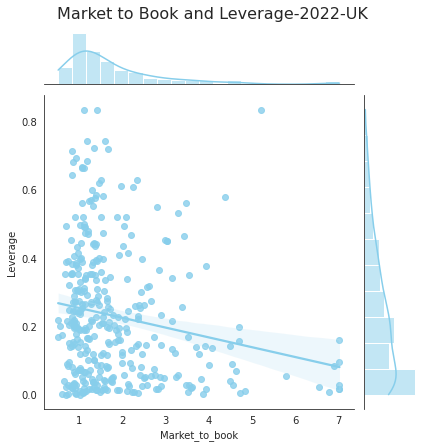

In [633]:
# 2022
with sns.axes_style('white'):
 p = sns.jointplot("Market_to_book","Leverage", data=df_uk_2022, kind='reg',
color='skyblue')
 p.fig.suptitle("Market to Book and Leverage-2022-UK",fontsize=16,y=1.03)
 
 plt.xlabel('MTB', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

Profitability vs Leverage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


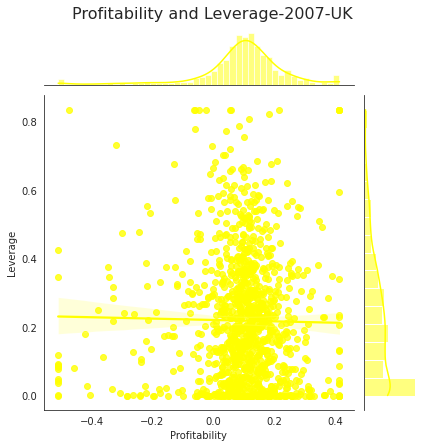

In [634]:
# 2007
with sns.axes_style('white'):
 p = sns.jointplot("Profitability","Leverage", data=df_uk_2007, kind='reg',
color='yellow')
 p.fig.suptitle("Profitability and Leverage-2007-UK",fontsize=16,y=1.03)
 
 plt.xlabel('Profitability', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


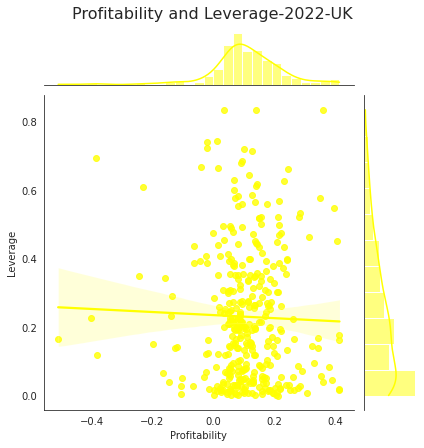

In [635]:
# 2022
with sns.axes_style('white'):
 p = sns.jointplot("Profitability","Leverage", data=df_uk_2022, kind='reg',
color='yellow')
 p.fig.suptitle("Profitability and Leverage-2022-UK",fontsize=16,y=1.03)
 
 plt.xlabel('Profitability', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

Coverage vs Leverage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


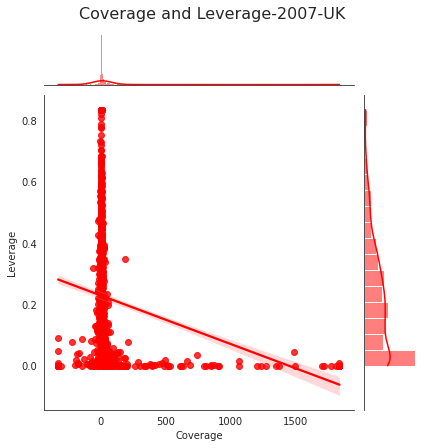

In [636]:
# 2007
with sns.axes_style('white'):
 p = sns.jointplot("Coverage","Leverage", data=df_uk_2007, kind='reg',
color='red')
 p.fig.suptitle("Coverage and Leverage-2007-UK",fontsize=16,y=1.03)
 
 plt.xlabel('Coverage', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


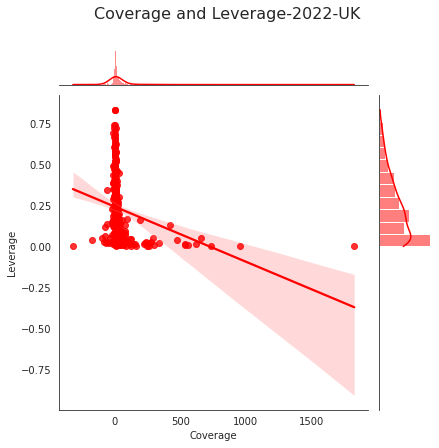

In [637]:
# 2022
with sns.axes_style('white'):
 p = sns.jointplot("Coverage","Leverage", data=df_uk_2022, kind='reg',
color='red')
 p.fig.suptitle("Coverage and Leverage-2022-UK",fontsize=16,y=1.03)
 
 plt.xlabel('Coverage', fontsize=13)
 plt.ylabel('Leverage', fontsize=13)
 plt.show()

## Correlation Analysis

In [638]:
from scipy import stats

In [639]:
df_corr = pd.DataFrame()
df_corr_p = pd.DataFrame()


In [640]:
for x in df_uk1.columns:
  for y in df_uk1.columns:
    corr = stats.pearsonr(df_uk1[x], df_uk1[y])
    df_corr.loc[x,y] = corr[0]
    df_corr_p.loc[x,y] = corr[1]

In [641]:
df_corr

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
Year,1.00,0.06,0.06,0.02,0.17,0.01,0.13,0.02,-0.02
TA,0.06,1.00,0.90,0.10,-0.04,0.04,0.60,0.10,-0.04
Total_debt,0.06,0.90,1.00,0.15,-0.03,0.04,0.58,0.23,-0.05
Tangibility,0.02,0.10,0.15,1.00,-0.17,0.01,0.22,0.37,-0.07
Market_to_book,0.17,-0.04,-0.03,-0.17,1.00,0.31,-0.06,-0.10,0.22
Profitability,0.01,0.04,0.04,0.01,0.31,1.00,0.14,-0.09,0.29
Logsale,0.13,0.60,0.58,0.22,-0.06,0.14,1.00,0.26,-0.06
Leverage,0.02,0.10,0.23,0.37,-0.10,-0.09,0.26,1.00,-0.22
Coverage,-0.02,-0.04,-0.05,-0.07,0.22,0.29,-0.06,-0.22,1.00


In [642]:
df_corr_p

,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
Year,0.00,0.00,0.00,0.02,0.00,0.10,0.00,0.01,0.00
TA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Total_debt,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Tangibility,0.02,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00
Market_to_book,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Profitability,0.10,0.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00
Logsale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Leverage,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Coverage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [643]:
CorrMatrix = df_uk1.corr()

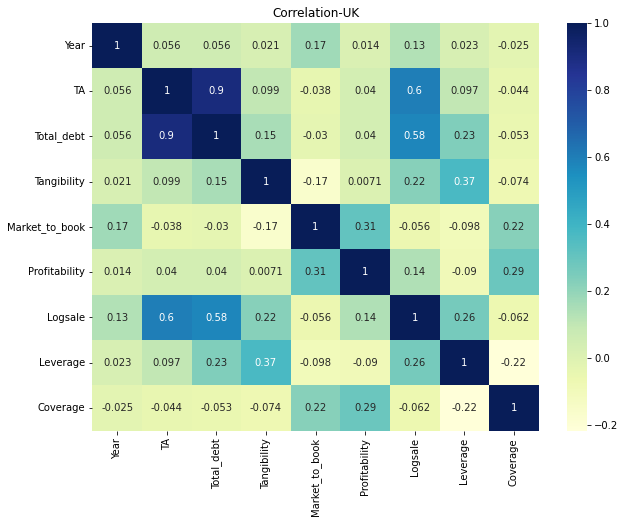

In [644]:
plt.subplots(figsize=(10,7.5))
sns.heatmap(CorrMatrix,annot=True,cmap="YlGnBu")
plt.title('Correlation-UK')
plt.show()

# Regression Analysis
Use of simple linear regression

In [645]:
from sklearn.linear_model import LinearRegression

In [664]:
X = df_uk_2022["Tangibility"].values.reshape(-1, 1) 
Y = df_uk_2022["Leverage"].values.reshape(-1, 1) 


In [665]:
linear_regressor = LinearRegression() # create object for the class
linear_regressor.fit(X, Y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions


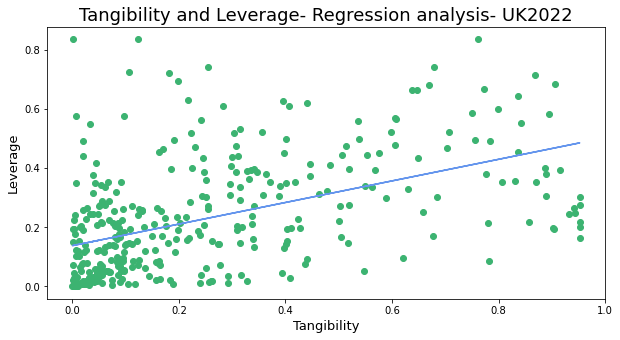

In [666]:
plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')
plt.title('Tangibility and Leverage- Regression analysis- UK2022', fontsize=18);
plt.xlabel('Tangibility', fontsize=13)
plt.ylabel('Leverage', fontsize=13)
plt.show()

In [667]:
X = df_uk_2022["Profitability"].values.reshape(-1, 1) 
Y = df_uk_2022["Leverage"].values.reshape(-1, 1) 

linear_regressor = LinearRegression() # create object for the class
linear_regressor.fit(X, Y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions


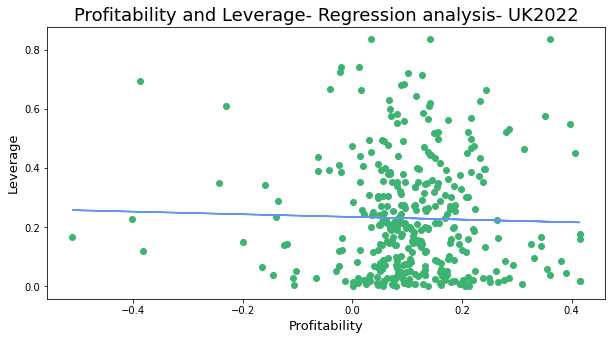

In [668]:
plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')
plt.title('Profitability and Leverage- Regression analysis- UK2022', fontsize=18);
plt.xlabel('Profitability', fontsize=13)
plt.ylabel('Leverage', fontsize=13)
plt.show()

In [669]:
X = df_uk_2022["Coverage"].values.reshape(-1, 1) 
Y = df_uk_2022["Leverage"].values.reshape(-1, 1) 

linear_regressor = LinearRegression() # create object for the class
linear_regressor.fit(X, Y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions


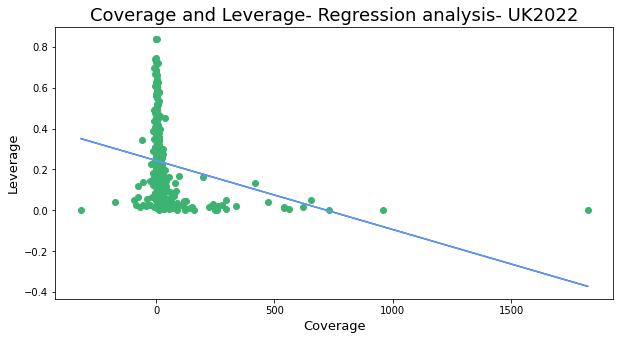

In [670]:
plt.figure(figsize=(10,5))
plt.scatter(X, Y,color='mediumseagreen')
plt.plot(X, Y_pred, color='cornflowerblue')
plt.title('Coverage and Leverage- Regression analysis- UK2022', fontsize=18);
plt.xlabel('Coverage', fontsize=13)
plt.ylabel('Leverage', fontsize=13)
plt.show()

Regression Analysis:

We use the ordinary least squares or ols method from the statsmodels to look at the relation between firm characteristics¶

In [653]:
import statsmodels.formula.api as sm

In [654]:
result = sm.ols(formula="Leverage ~ Tangibility + Market_to_book + Logsale + Profitability", data=df_uk1).fit()
print(result.params)

result.summary()

Intercept         0.07
Tangibility       0.23
Market_to_book    0.00
Logsale           0.02
Profitability    -0.17
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Leverage   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     752.5
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:00:21   Log-Likelihood:                 4705.7
No. Observations:               13458   AIC:                            -9401.
Df Residuals:                   13453   BIC:                            -9364.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0689      0.005     13.728      0.000       0.059       0.079
Tangibility        0.2273      0.006     40.099      0.000       0.216       0.238
Market_to_book     0.0009      0.001      0.650      0.516      -0.002       0.004
Logsale            0.0191      0.001     25.097      0.000       0.018       0.021
Profitability     -0.1711      0.012    -14.626      0.000      -0.194      -0.148
==============================================================================
Omnibus:                     2273.955   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4076.160
Skew:                           1.080   Prob(JB):                         0.00
Kurtosis:                       4.613   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comaring Leverage across the countries over the years

In [655]:
ddf = newdf[(newdf.COUNTRY == 'Australia')|(newdf.COUNTRY=='UK')]
df41=ddf.groupby(['COUNTRY', 'Year']).mean()
df_flat1 = df41.reset_index()
df_flat1.head()

,COUNTRY,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
0,Australia,2007,1600.74,539.67,0.30,2.10,0.13,5.56,0.25,193.11
1,Australia,2008,1694.88,605.41,0.29,1.49,0.08,5.57,0.27,290.17
2,Australia,2009,1723.49,540.03,0.31,1.26,0.05,5.64,0.28,398.73
3,Australia,2010,1693.34,469.52,0.29,1.34,0.08,5.65,0.26,136.99
4,Australia,2011,1713.24,450.72,0.28,1.38,0.07,5.60,0.25,165.95


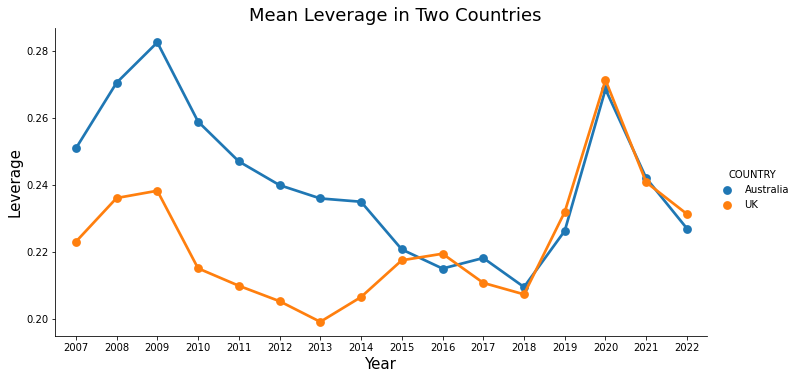

In [656]:
ax = sns.catplot(x="Year", y="Leverage", hue="COUNTRY", kind="point", data=df_flat1, height=5, aspect=2); # height should be three times width
ax.fig.suptitle('Mean Leverage in Two Countries',fontsize=18,y=1.03);
plt.xlabel('Year', fontsize=15);
plt.ylabel('Leverage', fontsize=15);

Correlation

In [659]:
from scipy import stats

df_corr = pd.DataFrame()
df_corr_p = pd.DataFrame()

for x in df_au1.columns:
    for y in df_au1.columns:
        corr = stats.pearsonr(df_au1[x], df_au1[y])
        df_corr.loc[x,y] = corr[0]
        df_corr_p.loc[x,y] = corr[1]

In [660]:
print('AUS')
df_corr

AUS


,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
Year,1.00,0.06,0.04,0.00,0.10,-0.05,0.06,-0.05,-0.03
TA,0.06,1.00,0.91,0.15,-0.04,0.06,0.69,0.13,-0.04
Total_debt,0.04,0.91,1.00,0.15,-0.03,0.04,0.62,0.29,-0.05
Tangibility,0.00,0.15,0.15,1.00,-0.14,0.02,0.21,0.17,-0.06
Market_to_book,0.10,-0.04,-0.03,-0.14,1.00,0.21,-0.08,-0.14,0.18
Profitability,-0.05,0.06,0.04,0.02,0.21,1.00,0.14,-0.17,0.28
Logsale,0.06,0.69,0.62,0.21,-0.08,0.14,1.00,0.22,-0.04
Leverage,-0.05,0.13,0.29,0.17,-0.14,-0.17,0.22,1.00,-0.18
Coverage,-0.03,-0.04,-0.05,-0.06,0.18,0.28,-0.04,-0.18,1.00


In [661]:
df_corr = pd.DataFrame()
df_corr_p = pd.DataFrame()

for x in df_uk1.columns:
    for y in df_uk1.columns:
        corr = stats.pearsonr(df_uk1[x], df_uk1[y])
        df_corr.loc[x,y] = corr[0]
        df_corr_p.loc[x,y] = corr[1]

In [662]:
print('UK')
df_corr

UK


,Year,TA,Total_debt,Tangibility,Market_to_book,Profitability,Logsale,Leverage,Coverage
Year,1.00,0.06,0.06,0.02,0.17,0.01,0.13,0.02,-0.02
TA,0.06,1.00,0.90,0.10,-0.04,0.04,0.60,0.10,-0.04
Total_debt,0.06,0.90,1.00,0.15,-0.03,0.04,0.58,0.23,-0.05
Tangibility,0.02,0.10,0.15,1.00,-0.17,0.01,0.22,0.37,-0.07
Market_to_book,0.17,-0.04,-0.03,-0.17,1.00,0.31,-0.06,-0.10,0.22
Profitability,0.01,0.04,0.04,0.01,0.31,1.00,0.14,-0.09,0.29
Logsale,0.13,0.60,0.58,0.22,-0.06,0.14,1.00,0.26,-0.06
Leverage,0.02,0.10,0.23,0.37,-0.10,-0.09,0.26,1.00,-0.22
Coverage,-0.02,-0.04,-0.05,-0.07,0.22,0.29,-0.06,-0.22,1.00
